In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns


In [5]:
data= {
    'Area (sq f)': [2600,3000,3200,3600,4000],
    'Price (BDT)': [550000,565000,610000,680000,725000]
}
#Create a DataFrame from the dictionary

df= pd.DataFrame(data)
display(df)

,Area (sq f),Price (BDT)
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


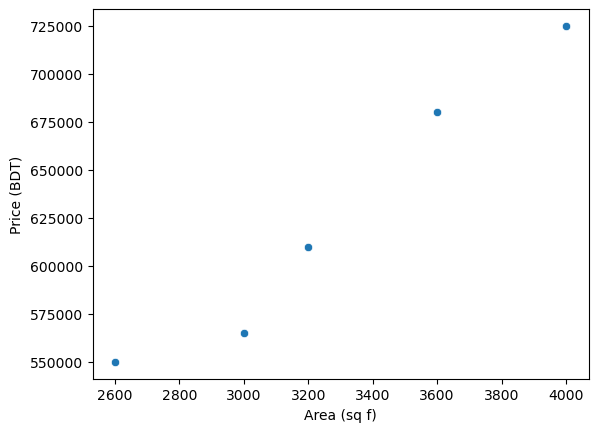

In [7]:
sns.scatterplot(data=df, x="Area (sq f)", y="Price (BDT)")
plt.show()

In [9]:
model = linear_model.LinearRegression()  # Create an object for linear regression
model.fit(df[['Area (sq f)']], df[['Price (BDT)']])  # Fit the model to the data


LinearRegression()

In [11]:
a=df[["Area (sq f)"]]
b=df["Price (BDT)"]
type(a),type(b)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(a,b)

LinearRegression()

In [17]:
# Extract m and c
m = model.coef_
c = model.intercept_

print(f"Slope (m): {m}")
print(f"coefficient(c): {c}")


Slope (m): [135.78767123]
coefficient(c): 180616.43835616432


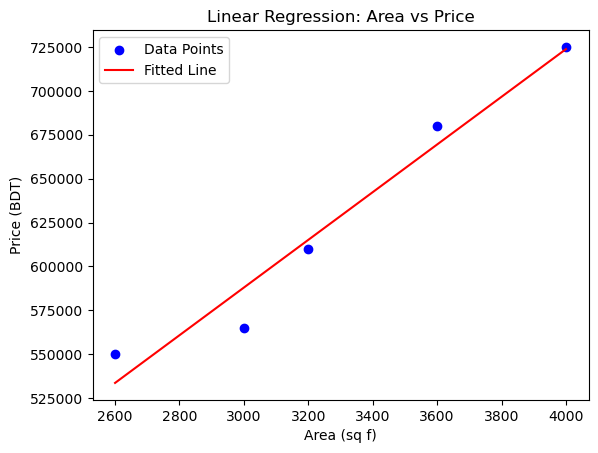

In [19]:
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(a,b, color='blue', label='Data Points')

# Plot the fitted line
plt.plot(a, model.predict(a), color='red', label='Fitted Line')

# Add labels and title
plt.xlabel('Area (sq f)')
plt.ylabel('Price (BDT)')
plt.title('Linear Regression: Area vs Price')
plt.legend()

# Show the plot
plt.show()

# multiple linear regreesstion

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [23]:
data = {
    "Area (sq f)": [2600, 3000, 3200, 3600, 4000],
    'Bedroom': [3, 4, np.nan, 3, 5],
    'Age': [20, 15, 18, 30, 8],
    "Price (BDT)": [550000, 565000, 610000, 595000, 760000]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)
display(df)


#median_bedroom

,Area (sq f),Bedroom,Age,Price (BDT)
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
# handle missing value

#df["Bedroom"]= df["Bedroom"].fillna(df["Bedroom"].median())
#print(df)

In [25]:
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  # সংখ্যা টাইপ ডেটার জন্য
        df[column].fillna(df[column].mean(), inplace=True)  # গড় দিয়ে পূরণ
    elif df[column].dtype == 'object':  # অবজেক্ট টাইপ ডেটার জন্য
        df[column].fillna(df[column].mode()[0], inplace=True)  # মোড দিয়ে পূরণ

display(df)

C:\Users\6510s\AppData\Local\Temp\ipykernel_2112\117432273.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)  # গড় দিয়ে পূরণ


,Area (sq f),Bedroom,Age,Price (BDT)
0,2600,3.00,20,550000
1,3000,4.00,15,565000
2,3200,3.75,18,610000
3,3600,3.00,30,595000
4,4000,5.00,8,760000


### model k Linear regression call kore fit kora model k

In [27]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model with the corrected syntax
model.fit(df[["Area (sq f)", "Bedroom", "Age"]], df[["Price (BDT)"]])

LinearRegression()

### Single vabe alada alda plot kora loop babohar kore

In [ ]:
#features = ["Area (sq f)", "Bedroom", "Age"]

#for feature in features:
    #sns.scatterplot(x=df[feature], y=df["Price (BDT)"])
    #plt.xlabel(feature)
    #plt.ylabel("Price (BDT)")
   # plt.title(f"{feature} vs Price")
    #plt.show()

## Visualization of the fitted model

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


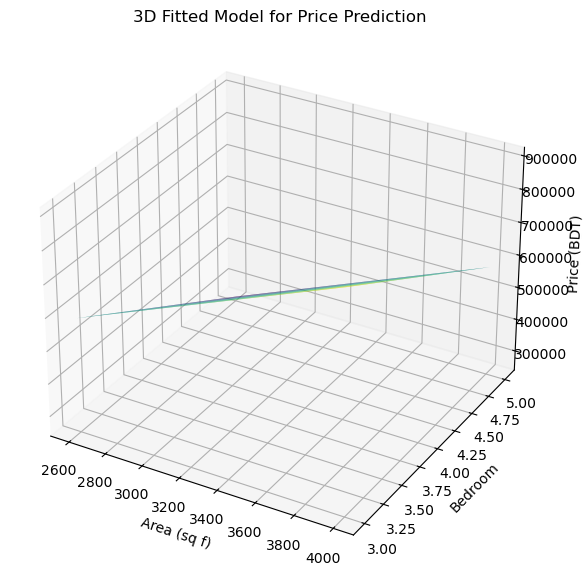

In [29]:
# MAKE 3D Map

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a mesh grid for plotting
x = np.linspace(df['Area (sq f)'].min(), df['Area (sq f)'].max(), 100)
y = np.linspace(df['Bedroom'].min(), df['Bedroom'].max(), 100)
x, y = np.meshgrid(x, y)

# Create a grid of the other feature 'Age' (using the median to keep it constant for visualization)
z = np.linspace(df['Age'].min(), df['Age'].max(), 100)
z = np.full_like(x, df['Age'].median())

# Predict the price for each combination of 'Area (sq f)' and 'Bedroom', keeping 'Age' constant
predicted_price = model.predict(np.c_[x.ravel(), y.ravel(), z.ravel()])
predicted_price = predicted_price.reshape(x.shape)

# Plot the surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, predicted_price, cmap='viridis')

# Labels and title
ax.set_xlabel('Area (sq f)')
ax.set_ylabel('Bedroom')
ax.set_zlabel('Price (BDT)')
ax.set_title('3D Fitted Model for Price Prediction')

# Show the plot
plt.show()

In [31]:
## find out the coefficient
coefficient = model.coef_
intercept= model.intercept_
print("Coefficients (m):", coefficient)
print("Intercept (b):", intercept)

Coefficients (m): [[    230.59826103 -167936.0972381   -18554.36548529]]
Intercept (b): [827087.52030808]


In [33]:
Predict_price=model.predict([[3300, 5, 10]])
print(f"House Price:{Predict_price}")

House Price:[[562837.64065227]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 10 ta feature thakle kmne predict korbo

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [37]:
data = {
    "Area (sq f)": [2600, 3000, 3200, 3600, 4000],
    "Bedrooms": [3, 4, 3, 3, 5],
    "Bathrooms": [2, 3, 2, 2, 3],
    "Location": ["City Center", "Suburbs", np.nan, "Rural", "City Center"],
    "Age": [20, 15, np.nan, 30, 8],
    "Nearby Schools": [5, 4, 3, 2, 6],
    "Nearby Hospitals": [2, np.nan, 3, 1, 2],
    "Crime Rate": [0.1, 0.2, 0.15, 0.3, 0.05],
    "Transport Accessibility": [9, 7, 6, 5, 10],
    "Environment Score": [8.5, 7.8, 6.2, 5.5, 9.1],
    "Price (BDT)": [550000, 565000, 610000, 595000, 760000]
}
df = pd.DataFrame(data)
display(df)

,Area (sq f),Bedrooms,Bathrooms,Location,Age,Nearby Schools,Nearby Hospitals,Crime Rate,Transport Accessibility,Environment Score,Price (BDT)
0,2600,3,2,City Center,20.0,5,2.0,0.10,9,8.5,550000
1,3000,4,3,Suburbs,15.0,4,NaN,0.20,7,7.8,565000
2,3200,3,2,NaN,NaN,3,3.0,0.15,6,6.2,610000
3,3600,3,2,Rural,30.0,2,1.0,0.30,5,5.5,595000
4,4000,5,3,City Center,8.0,6,2.0,0.05,10,9.1,760000


In [39]:
# solve the all missing dataset

for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  # সংখ্যা টাইপ ডেটার জন্য
        df[column].fillna(df[column].mean(), inplace=True)  # গড় দিয়ে পূরণ
    elif df[column].dtype == 'object':  # অবজেক্ট টাইপ ডেটার জন্য
        df[column].fillna(df[column].mode()[0], inplace=True)  # মোড দিয়ে পূরণ

display(df)

C:\Users\6510s\AppData\Local\Temp\ipykernel_2112\2859714088.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)  # গড় দিয়ে পূরণ
C:\Users\6510s\AppData\Local\Temp\ipykernel_2112\2859714088.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

,Area (sq f),Bedrooms,Bathrooms,Location,Age,Nearby Schools,Nearby Hospitals,Crime Rate,Transport Accessibility,Environment Score,Price (BDT)
0,2600,3,2,City Center,20.00,5,2.0,0.10,9,8.5,550000
1,3000,4,3,Suburbs,15.00,4,2.0,0.20,7,7.8,565000
2,3200,3,2,City Center,18.25,3,3.0,0.15,6,6.2,610000
3,3600,3,2,Rural,30.00,2,1.0,0.30,5,5.5,595000
4,4000,5,3,City Center,8.00,6,2.0,0.05,10,9.1,760000


In [41]:
print(df.columns)

Index(['Area (sq f)', 'Bedrooms', 'Bathrooms', 'Location', 'Age',
       'Nearby Schools', 'Nearby Hospitals', 'Crime Rate',
       'Transport Accessibility', 'Environment Score', 'Price (BDT)'],
      dtype='object')


In [43]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()
df['Location'] = label_encoder.fit_transform(df['Location'])

print(df)

   Area (sq f)  Bedrooms  Bathrooms  Location    Age  Nearby Schools  \
0         2600         3          2         0  20.00               5   
1         3000         4          3         2  15.00               4   
2         3200         3          2         0  18.25               3   
3         3600         3          2         1  30.00               2   
4         4000         5          3         0   8.00               6   

   Nearby Hospitals  Crime Rate  Transport Accessibility  Environment Score  \
0               2.0        0.10                        9                8.5   
1               2.0        0.20                        7                7.8   
2               3.0        0.15                        6                6.2   
3               1.0        0.30                        5                5.5   
4               2.0        0.05                       10                9.1   

   Price (BDT)  
0       550000  
1       565000  
2       610000  
3       595000  
4      

In [45]:
X = df.drop('Price (BDT)', axis=1)  # ফিচারগুলো
y = df['Price (BDT)'] 

In [47]:
# model Fit kora

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [49]:
## find out the coefficient
coefficient = model.coef_
intercept= model.intercept_
print("Coefficients (m):", coefficient)
print("Intercept (b):", intercept)

Coefficients (m): [   127.23061901  -3705.53795682  -4687.02512284 -12637.85679916
  -2843.59690631   3238.22166867   4957.96944666   -693.23517021
   6550.42895371     47.93194802]
Intercept (b): 211163.98696062015


In [59]:
new_data = pd.DataFrame({
    "Area (sq f)": [3500],
    "Bedrooms": [4],
    "Bathrooms": [3],
    "Location": ["City Center"],
    "Age": [10],
    "Nearby Schools": [5],
    "Nearby Hospitals": [2],
    "Crime Rate": [0.05],
    "Transport Accessibility": [8],
    "Environment Score": [9.2]
})

# Encode the 'Location' column in new_data using the same LabelEncoder
new_data['Location'] = label_encoder.fit_transform(new_data['Location'])

# Predict house price
predicted_price = model.predict(new_data)
print(f"Predicted Price: {predicted_price[0]}")

Predicted Price: 679475.098893476


In [ ]:
# Over view of multiple Linear Regression Mod

In [53]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Training dataset
data = {
    "Area (sq f)": [2600, 3000, 3200, 3600, 4000],
    "Bedrooms": [3, 4, 3, 3, 5],
    "Bathrooms": [2, 3, 2, 2, 3],
    "Location": ["City Center", "Suburbs", "Rural", "Rural", "City Center"],
    "Age": [20, 15, 18, 30, 8],
    "Nearby Schools": [5, 4, 3, 2, 6],
    "Nearby Hospitals": [2, 1, 3, 1, 2],
    "Crime Rate": [0.1, 0.2, 0.15, 0.3, 0.05],
    "Transport Accessibility": [9, 7, 6, 5, 10],
    "Environment Score": [8.5, 7.8, 6.2, 5.5, 9.1],
    "Price (BDT)": [550000, 565000, 610000, 595000, 760000]
}

df = pd.DataFrame(data)

# Label encode 'Location' for the training data
label_encoder = LabelEncoder()
df['Location'] = label_encoder.fit_transform(df['Location'])

# Define features (X) and target (y)
X = df.drop('Price (BDT)', axis=1)
y = df['Price (BDT)']

# Train the LinearRegression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# New data for prediction
new_data = pd.DataFrame({
    "Area (sq f)": [3500],
    "Bedrooms": [4],
    "Bathrooms": [3],
    "Location": ["City Center"],  # Location remains as a string here
    "Age": [10],
    "Nearby Schools": [5],
    "Nearby Hospitals": [2],
    "Crime Rate": [0.05],
    "Transport Accessibility": [8],
    "Environment Score": [9.2]
})

# Encode the 'Location' column in new_data using the same LabelEncoder
new_data['Location'] = label_encoder.transform(new_data['Location'])

# Predict house price
predicted_price = model.predict(new_data)
print(f"Predicted Price: {predicted_price[0]}")

Predicted Price: 679475.098893476


# Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [ ]:
data = {
    "Age": [22, 25, 47, 52, 46, 56, 55, 60, 62,
           61, 18,28, 27, 29, 49, 55, 25, 58, 19, 18,
           21, 26, 40, 45, 50, 54, 23],
    "Possibility": [0,0,1,0,1,1,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,
                   1,1,1,1,0]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

print(df)

In [ ]:
sns.scatterplot(x='Age', y= 'Possibility', data = df, color ='b', hue = 'Possibility')
plt.show()


# linear regrest ion and logistic regresion Difference

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(df[["Age"]],df[["Possibility"]],test_size=0.2)

model = LogisticRegression()
model.fit(xtrain,ytrain)